In [1]:
import re

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / N

In [3]:
def get_results(log_path):
    # Regular expression to match log lines
    log_pattern = re.compile(
        r"epoch: (\d+), step: (\d+), time: ([\d.]+), train: ([\d.]+), valid: ([\d.]+), train_acc: ([\d.]+), valid_acc: ([\d.]+)"
    )
    epoch = []
    step = []
    time = []
    train_loss = []
    valid_loss = []
    train_acc = []
    valid_acc = []

    with open(log_path, "r") as f:
        for line in f:
            match = log_pattern.match(line)
            if match:
                epoch.append(int(match.group(1)))
                step.append(int(match.group(2)))
                time.append(float(match.group(3)))
                train_loss.append(float(match.group(4)))
                valid_loss.append(float(match.group(5)))
                train_acc.append(float(match.group(6)))
                valid_acc.append(float(match.group(7)))

    return {
        "epoch": np.array(epoch),
        "step": np.array(step),
        "time": np.array(time),
        "train_loss": np.array(train_loss),
        "valid_loss": np.array(valid_loss),
        "train_acc": np.array(train_acc),
        "valid_acc": np.array(valid_acc),
    }

In [4]:
def plot_results(log_path, window_size=10):
    results = get_results(log_path)
    epoch = results["epoch"]
    train_loss = results["train_loss"]
    valid_loss = results["valid_loss"]
    train_acc = results["train_acc"]
    valid_acc = results["valid_acc"]

    train_loss = running_mean(train_loss, window_size)
    valid_loss = running_mean(valid_loss, window_size)
    train_acc = running_mean(train_acc, window_size)
    valid_acc = running_mean(valid_acc, window_size)

    epoch = epoch[window_size - 1 :]

    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    axs[0].plot(epoch, train_loss, label="train")
    axs[0].plot(epoch, valid_loss, label="valid")
    axs[0].set_title("Loss")
    axs[0].legend()
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Loss")

    axs[1].plot(epoch, train_acc, label="train")
    axs[1].plot(epoch, valid_acc, label="valid")
    axs[1].set_title("Accuracy")
    axs[1].legend()
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Accuracy")

    plt.show()

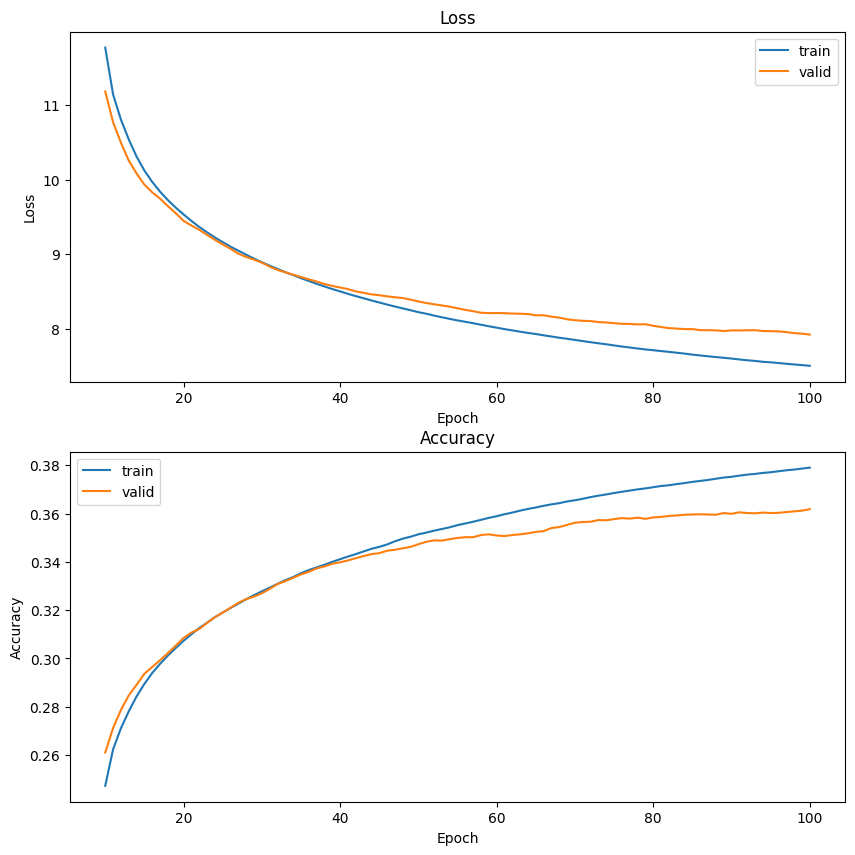

In [5]:
# Trained on 1/30 of the data
plot_results("./model_params/log.txt")